# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read File

In [107]:
terrorism = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1", usecols = ['iyear','imonth','iday',
'country_txt','region_txt','city','success','suicide','attacktype1_txt','targtype1_txt','weaptype1_txt','ransomamt'])
terrorism_df = pd.DataFrame(terrorism)
print(terrorism.head())

   iyear  imonth  iday         country_txt                   region_txt  \
0   1970       7     2  Dominican Republic  Central America & Caribbean   
1   1970       0     0              Mexico                North America   
2   1970       1     0         Philippines               Southeast Asia   
3   1970       1     0              Greece               Western Europe   
4   1970       1     0               Japan                    East Asia   

            city  success  suicide                 attacktype1_txt  \
0  Santo Domingo        1        0                   Assassination   
1    Mexico city        1        0     Hostage Taking (Kidnapping)   
2        Unknown        1        0                   Assassination   
3         Athens        1        0               Bombing/Explosion   
4        Fukouka        1        0  Facility/Infrastructure Attack   

                 targtype1_txt weaptype1_txt  ransomamt  
0  Private Citizens & Property       Unknown        NaN  
1      Gover

# .describe()

In [7]:
terrorism_df.describe()

,iyear,imonth,iday,success,suicide,ransomamt
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,1.350000e+03
mean,2002.638997,6.467277,15.505644,0.889598,0.036507,3.172530e+06
std,13.259430,3.388303,8.814045,0.313391,0.187549,3.021157e+07
min,1970.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01
25%,1991.000000,4.000000,8.000000,1.000000,0.000000,0.000000e+00
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,1.500000e+04
75%,2014.000000,9.000000,23.000000,1.000000,0.000000,4.000000e+05
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000e+09


In [9]:
terrorism_df['weaptype1_txt'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [10]:
terrorism_df['targtype1_txt'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

# Countries by Terrorist Attacks(Descending)

In [11]:
terrorism_df['country_txt'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

# Regions by Terrorist Attacks(Descending)

In [12]:
terrorism_df['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

# Cities by Terrorist Attacks(Descending)

In [50]:
df_city_counts = terrorism_df['city'].value_counts()
df_city_counts

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: city, Length: 36674, dtype: int64

# Cities by Successfull Terrorist Attacks

In [79]:
counts_by_city_df = terrorism_df.groupby('city')['success'].sum()
counts_by_city_df = pd.DataFrame(counts_by_city_df)
counts_by_city_df = counts_by_city_df.sort_values(by = 'success', ascending = False)
counts_by_city_df

,success
city,
Unknown,8705
Baghdad,7226
Karachi,2428
Lima,2176
Mosul,1902
...,...
Holanda Alta,0
Tolbung Bangla,0
Datu Anggal Midtimbang district,0


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

# Terrorist Attacks by Year(Descending)

In [16]:
terrorism_df['iyear'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

# Terrorist Attacks by Month(Descending)

In [17]:
terrorism_df['imonth'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: imonth, dtype: int64

# Box Plot of Terrorist Atacks by Year

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='iyear'>

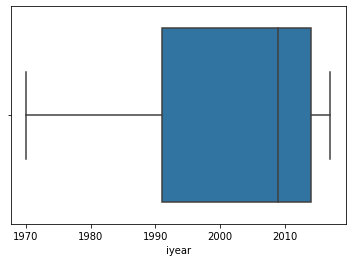

In [22]:
sns.boxplot(terrorism_df['iyear'])

# Distribution Plot of Terrorist Atacks by Year

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='iyear', ylabel='Density'>

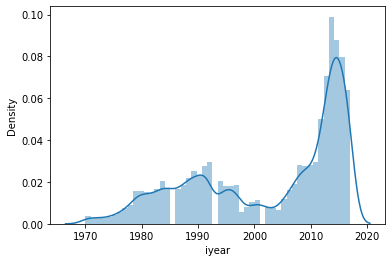

In [121]:
sns.distplot(terrorism_df['iyear'])

# Graph b/w Countries and number of attacks in each of them 

In [119]:
attacks_by_country = terrorism_df.groupby('country_txt').count()
attacks_by_country


,iyear,imonth,iday,region_txt,city,success,suicide,attacktype1_txt,targtype1_txt,weaptype1_txt,ransomamt,attack each year
country_txt,,,,,,,,,,,,
Afghanistan,12731,12731,12731,12731,12592,12731,12731,12731,12731,12731,29,0
Albania,80,80,80,80,80,80,80,80,80,80,0,0
Algeria,2743,2743,2743,2743,2736,2743,2743,2743,2743,2743,41,0
Andorra,1,1,1,1,1,1,1,1,1,1,0,0
Angola,499,499,499,499,499,499,499,499,499,499,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347,13,0
Yugoslavia,203,203,203,203,203,203,203,203,203,203,0,1
Zaire,50,50,50,50,50,50,50,50,50,50,0,0


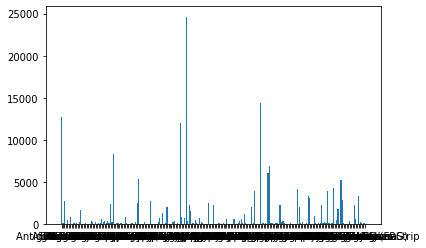

In [120]:
plt.bar(attacks_by_country.index,attacks_by_country['iyear'])
plt.show()

# Attacks Successfull and Not Successful

In [102]:
terrorism_df.groupby('success').count()

,iyear,imonth,iday,country_txt,region_txt,city,suicide,attacktype1_txt,targtype1_txt,weaptype1_txt,ransomamt
success,,,,,,,,,,,
0,20059,20059,20059,20059,20059,20031,20059,20059,20059,20059,43
1,161632,161632,161632,161632,161632,161226,161632,161632,161632,161632,1307


# Attacks each year

In [115]:
attacks_by_year_df = terrorism_df.groupby('iyear').count()
#attacks_by_year_df
attacks_by_year_df['attack each year'] = attacks_by_year_df['imonth']
print(attacks_by_year_df.index, attacks_by_year_df['attack each year'])

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017],
           dtype='int64', name='iyear') iyear
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    1

<BarContainer object of 47 artists>

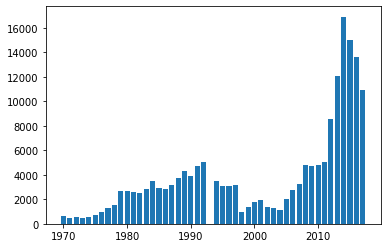

In [117]:
plt.bar(attacks_by_year_df.index , attacks_by_year_df['attack each year'])

# Successful attacks each year

In [85]:
attacks_by_city_success_df = terrorism_df.groupby('iyear')['success'].sum()
attacks_by_city_success_df = pd.DataFrame(attacks_by_city_success_df)
attacks_by_city_success_df

,success
iyear,
1970,549
1971,420
1972,452
1973,433
1974,545
1975,705
1976,861
1977,1191
1978,1411


# All Attacks vs. Successful attacks each year

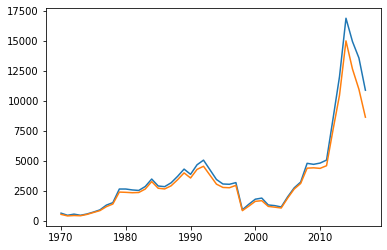

In [118]:
fig, ax = plt.subplots()
ax.plot(attacks_by_year_df.index, attacks_by_year_df['attack each year'])
ax.plot(attacks_by_city_success_df.index, attacks_by_city_success_df['success'])